Goal : Predict rain sum (mm)

# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
train_data = pd.read_csv('train.csv')
train_h_data = pd.read_csv('train_hourly.csv')
test_data = pd.read_csv('test.csv')
test_h_data = pd.read_csv('test_hourly.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13258 entries, 0 to 13257
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             13258 non-null  object 
 1   temperature_2m_max (°C)          13208 non-null  float64
 2   temperature_2m_min (°C)          13208 non-null  float64
 3   apparent_temperature_max (°C)    13208 non-null  float64
 4   apparent_temperature_min (°C)    13208 non-null  float64
 5   sunrise (iso8601)                13258 non-null  object 
 6   sunset (iso8601)                 13258 non-null  object 
 7   shortwave_radiation_sum (MJ/m²)  13198 non-null  float64
 8   rain_sum (mm)                    13198 non-null  float64
 9   snowfall_sum (cm)                13198 non-null  float64
 10  windspeed_10m_max (km/h)         13208 non-null  float64
 11  windgusts_10m_max (km/h)         13208 non-null  float64
 12  winddirection_10m_

In [4]:
train_h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318192 entries, 0 to 318191
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   time                                318192 non-null  object 
 1   temperature_2m (°C)                 318022 non-null  float64
 2   relativehumidity_2m (%)             318022 non-null  float64
 3   dewpoint_2m (°C)                    318022 non-null  float64
 4   apparent_temperature (°C)           318022 non-null  float64
 5   pressure_msl (hPa)                  318022 non-null  float64
 6   surface_pressure (hPa)              318022 non-null  float64
 7   snowfall (cm)                       318022 non-null  float64
 8   cloudcover (%)                      318022 non-null  float64
 9   cloudcover_low (%)                  318022 non-null  float64
 10  cloudcover_mid (%)                  318022 non-null  float64
 11  cloudcover_high (%)       

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4972 entries, 0 to 4971
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               4972 non-null   int64  
 1   time                             4972 non-null   object 
 2   temperature_2m_max (°C)          4972 non-null   float64
 3   temperature_2m_min (°C)          4972 non-null   float64
 4   apparent_temperature_max (°C)    4972 non-null   float64
 5   apparent_temperature_min (°C)    4972 non-null   float64
 6   sunrise (iso8601)                4972 non-null   object 
 7   sunset (iso8601)                 4972 non-null   object 
 8   shortwave_radiation_sum (MJ/m²)  4972 non-null   float64
 9   snowfall_sum (cm)                4972 non-null   float64
 10  windspeed_10m_max (km/h)         4972 non-null   float64
 11  windgusts_10m_max (km/h)         4972 non-null   float64
 12  winddirection_10m_do

In [6]:
test_h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119328 entries, 0 to 119327
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   time                                119328 non-null  object 
 1   temperature_2m (°C)                 119328 non-null  float64
 2   relativehumidity_2m (%)             119328 non-null  float64
 3   dewpoint_2m (°C)                    119328 non-null  float64
 4   apparent_temperature (°C)           119328 non-null  float64
 5   pressure_msl (hPa)                  119328 non-null  float64
 6   surface_pressure (hPa)              119328 non-null  float64
 7   snowfall (cm)                       119328 non-null  float64
 8   cloudcover (%)                      119328 non-null  float64
 9   cloudcover_low (%)                  119328 non-null  float64
 10  cloudcover_mid (%)                  119328 non-null  float64
 11  cloudcover_high (%)       

hanya data hourly mengenai winddirection_100m yang memiliki Null

In [19]:
train_data['time'].nunique()

1418

In [31]:
train_data

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),...,elevation,city,relativehumidity_2m_max (%),relativehumidity_2m_min (%),windspeed_10m_min (km/h),windgusts_10m_min (km/h),temperature_2m_avg (°C),relativehumidity_2m_avg (%),windspeed_10m_avg (km/h),windgusts_10m_avg (km/h)
0,2018-01-01,16.5,16.5,36.3,31.6,2018-01-01T05:15,2018-01-01T17:49,17.59,7.7,0.0,...,0,su,99.0,99.0,1.5,10.1,16.5,99.0,1.5,10.1
1,2018-01-02,25.5,25.5,37.7,31.2,2018-01-02T05:15,2018-01-02T17:50,19.87,9.4,0.0,...,0,su,96.0,96.0,3.4,6.8,25.5,96.0,3.4,6.8
2,2018-01-03,24.0,24.0,40.3,31.7,2018-01-03T05:16,2018-01-03T17:50,20.44,7.8,0.0,...,0,su,95.0,95.0,6.3,16.2,24.0,95.0,6.3,16.2
3,2018-01-04,25.4,25.4,39.1,31.6,2018-01-04T05:16,2018-01-04T17:50,20.44,29.7,0.0,...,0,su,87.0,87.0,4.8,18.4,25.4,87.0,4.8,18.4
4,2018-01-05,-21.5,-21.5,37.6,29.9,2018-01-05T05:17,2018-01-05T17:51,20.10,22.5,0.0,...,0,su,72.0,72.0,9.2,12.6,-21.5,72.0,9.2,12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13253,2022-12-24,25.8,25.8,NaN,NaN,1970-01-01T07:00,1970-01-01T07:00,NaN,NaN,NaN,...,0,q,90.0,90.0,1.3,7.6,25.8,90.0,1.3,7.6
13254,2022-12-25,-18.7,-18.7,NaN,NaN,1970-01-01T07:00,1970-01-01T07:00,NaN,NaN,NaN,...,0,q,55.0,55.0,2.9,9.0,-18.7,55.0,2.9,9.0
13255,2022-12-26,-11.3,-11.3,NaN,NaN,1970-01-01T07:00,1970-01-01T07:00,NaN,NaN,NaN,...,0,q,79.0,79.0,16.8,40.0,-11.3,79.0,16.8,40.0
13256,2022-12-27,23.8,23.8,NaN,NaN,1970-01-01T07:00,1970-01-01T07:00,NaN,NaN,NaN,...,0,q,99.0,99.0,3.3,7.9,23.8,99.0,3.3,7.9


In [46]:
train_h_data['shortwave_radiation (W/m²)'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: shortwave_radiation (W/m²), dtype: float64

In [6]:
train_data.columns

Index(['time', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
       'sunrise (iso8601)', 'sunset (iso8601)',
       'shortwave_radiation_sum (MJ/m²)', 'rain_sum (mm)', 'snowfall_sum (cm)',
       'windspeed_10m_max (km/h)', 'windgusts_10m_max (km/h)',
       'winddirection_10m_dominant (°)', 'et0_fao_evapotranspiration (mm)',
       'elevation', 'city'],
      dtype='object')

In [7]:
train_h_data.columns

Index(['time', 'temperature_2m (°C)', 'relativehumidity_2m (%)',
       'dewpoint_2m (°C)', 'apparent_temperature (°C)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'snowfall (cm)', 'cloudcover (%)',
       'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)',
       'shortwave_radiation (W/m²)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)',
       'windspeed_10m (km/h)', 'windspeed_100m (km/h)',
       'winddirection_10m (°)', 'winddirection_100m (°)',
       'windgusts_10m (km/h)', 'et0_fao_evapotranspiration (mm)',
       'vapor_pressure_deficit (kPa)', 'soil_temperature_0_to_7cm (°C)',
       'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)', 'city'],
      dtype='object')

# Data Cleansing

<AxesSubplot:>

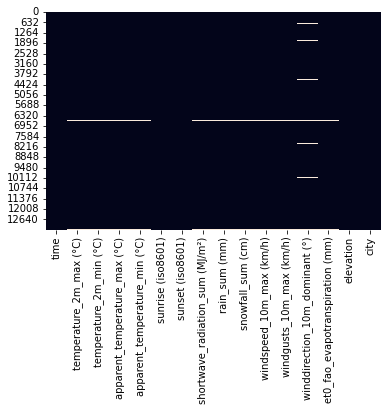

In [8]:
sns.heatmap(train_data.isnull(), cbar=False)

<AxesSubplot:>

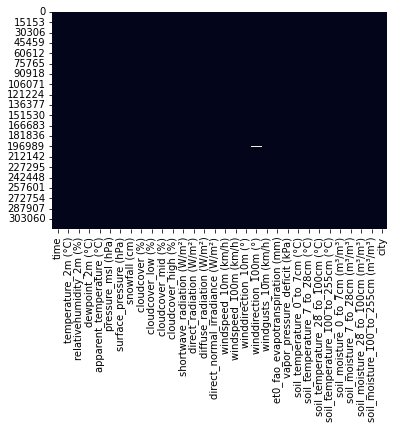

In [9]:
sns.heatmap(train_h_data.isnull(), cbar=False)

In [50]:
train_data = pd.read_csv('train.csv')
train_h_data = pd.read_csv('train_hourly.csv')
test_data = pd.read_csv('test.csv')
test_h_data = pd.read_csv('test_hourly.csv')

train_h_grouped_data = train_h_data.copy()

train_h_grouped_data["time_d"] = pd.to_datetime(train_h_grouped_data["time"]).dt.date
train_h_grouped_data["time_d"] = train_h_grouped_data["time_d"].apply(str) 

train_h_avg_data = train_h_grouped_data.groupby(['time', 'city']).mean().reset_index().copy()
train_h_max_data = train_h_grouped_data.groupby(['time', 'city']).max().reset_index().copy()
train_h_min_data = train_h_grouped_data.groupby(['time', 'city']).min().reset_index().copy()
train_h_sum_data = train_h_grouped_data.groupby(['time', 'city']).sum().reset_index().copy()

KeyError: 'time'

In [57]:
fill = [
    ['temperature_2m (°C)', 'temperature_2m_max (°C)', 'max'],
    ['temperature_2m (°C)', 'temperature_2m_min (°C)', 'min'],
    ['relativehumidity_2m (%)', 'relativehumidity_2m_max (%)', 'max'],
    ['relativehumidity_2m (%)', 'relativehumidity_2m_min (%)', 'min'],
    ['apparent_temperature (°C)', 'apparent_temperature_max (°C)', 'max'],
    ['apparent_temperature (°C)', 'apparent_temperature_min (°C)', 'min'],
    ['windspeed_10m (km/h)', 'windspeed_10m_max (km/h)', 'max'],
    ['windspeed_10m (km/h)', 'windspeed_10m_min (km/h)', 'max'],
    ['windgusts_10m (km/h)', 'windgusts_10m_max (km/h)', 'max'],
    ['windgusts_10m (km/h)', 'windgusts_10m_min (km/h)', 'min']
]

for i in fill: 
    if i[2] == 'max': 
        train_data[i[1]] = train_h_max_data[i[0]]
    else:
        train_data[i[1]] = train_h_min_data[i[0]]

train_data['temperature_2m_avg (°C)'] = train_h_avg_data['temperature_2m (°C)']
train_data['relativehumidity_2m_avg (%)'] = train_h_avg_data['relativehumidity_2m (%)']
train_data['windspeed_10m_avg (km/h)'] = train_h_avg_data['windspeed_10m (km/h)']
train_data['windgusts_10m_avg (km/h)'] = train_h_avg_data['windgusts_10m (km/h)']
train_data['snowfall_sum (cm)'] = train_h_sum_data['snowfall (cm)']
# train_data['shortwave_radiation_sum (MJ/m²)'] = train_h_sum_data['shortwave_radiation (W/m²)'] * 0.0036
# train_data['winddirection_10m_dominant (°)'] = train_h_mode_data['winddirection_10m (°)']


In [66]:
train_data = train_data.dropna(subset=['rain_sum (mm)'])

In [67]:
train_data.isnull().sum()

time                                 0
temperature_2m_max (°C)              0
temperature_2m_min (°C)              0
apparent_temperature_max (°C)        0
apparent_temperature_min (°C)        0
sunrise (iso8601)                    0
sunset (iso8601)                     0
shortwave_radiation_sum (MJ/m²)      0
rain_sum (mm)                        0
snowfall_sum (cm)                    0
windspeed_10m_max (km/h)             0
windgusts_10m_max (km/h)             0
winddirection_10m_dominant (°)     406
et0_fao_evapotranspiration (mm)      0
elevation                            0
city                                 0
relativehumidity_2m_max (%)          0
relativehumidity_2m_min (%)          0
windspeed_10m_min (km/h)             0
windgusts_10m_min (km/h)             0
temperature_2m_avg (°C)              0
relativehumidity_2m_avg (%)          0
windspeed_10m_avg (km/h)             0
windgusts_10m_avg (km/h)             0
dtype: int64

# Model